In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Data Preprocessing

In [32]:
d1 = pd.read_csv('IRIS.csv')
d1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
d1.shape

(150, 5)

In [35]:
d1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
d1.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [37]:
d1['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [38]:
d1.drop_duplicates(inplace=True)

# EDA

<Axes: xlabel='species', ylabel='sepal_length'>

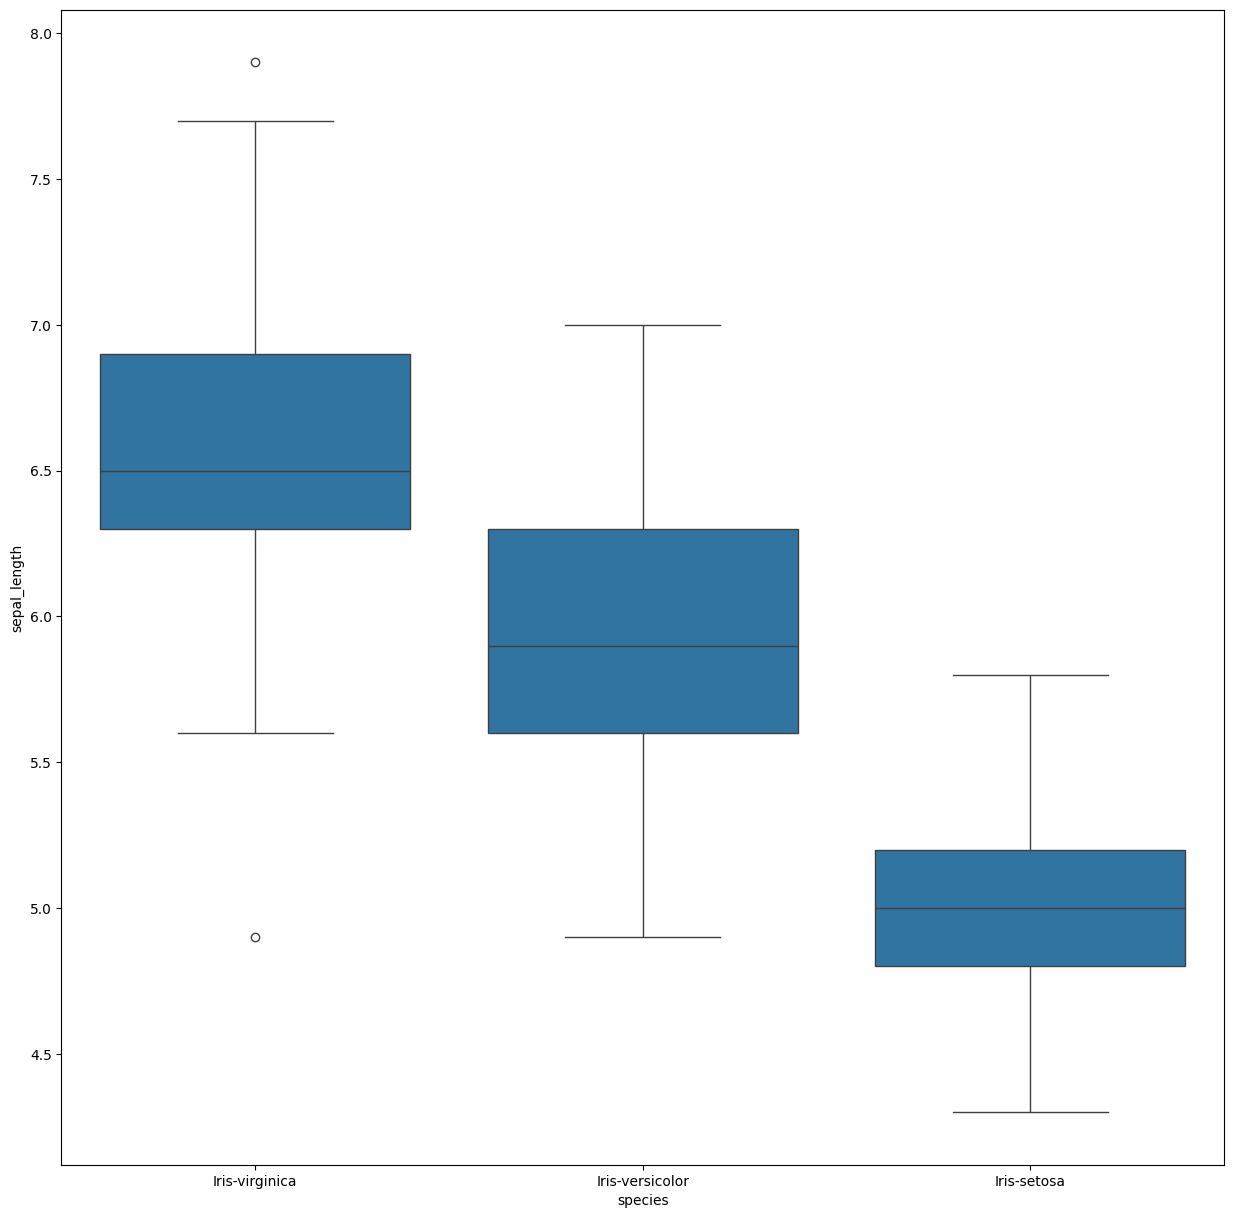

In [39]:
plt.figure(figsize=(15,15))
sns.boxplot(x='species',y='sepal_length',data=d1.sort_values('sepal_length',ascending=False))


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

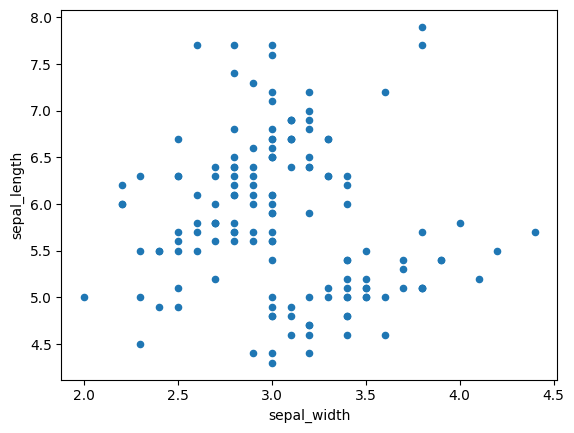

In [40]:
d1.plot(kind='scatter',x='sepal_width',y='sepal_length')

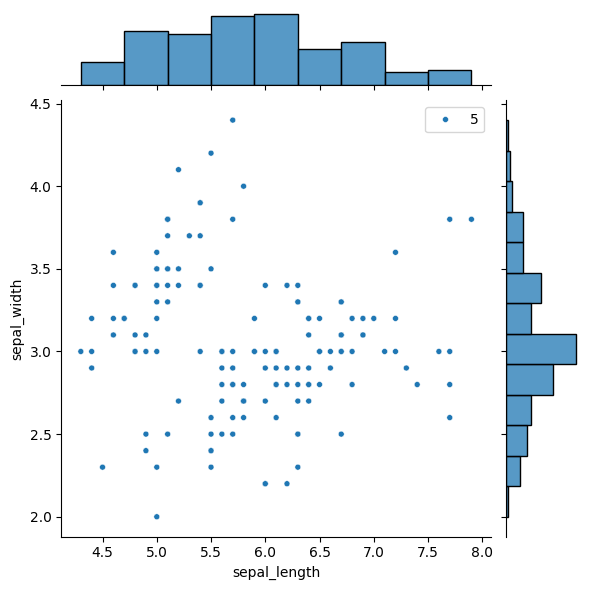

In [41]:
sns.jointplot(x="sepal_length", y="sepal_width", data=d1, size=5)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


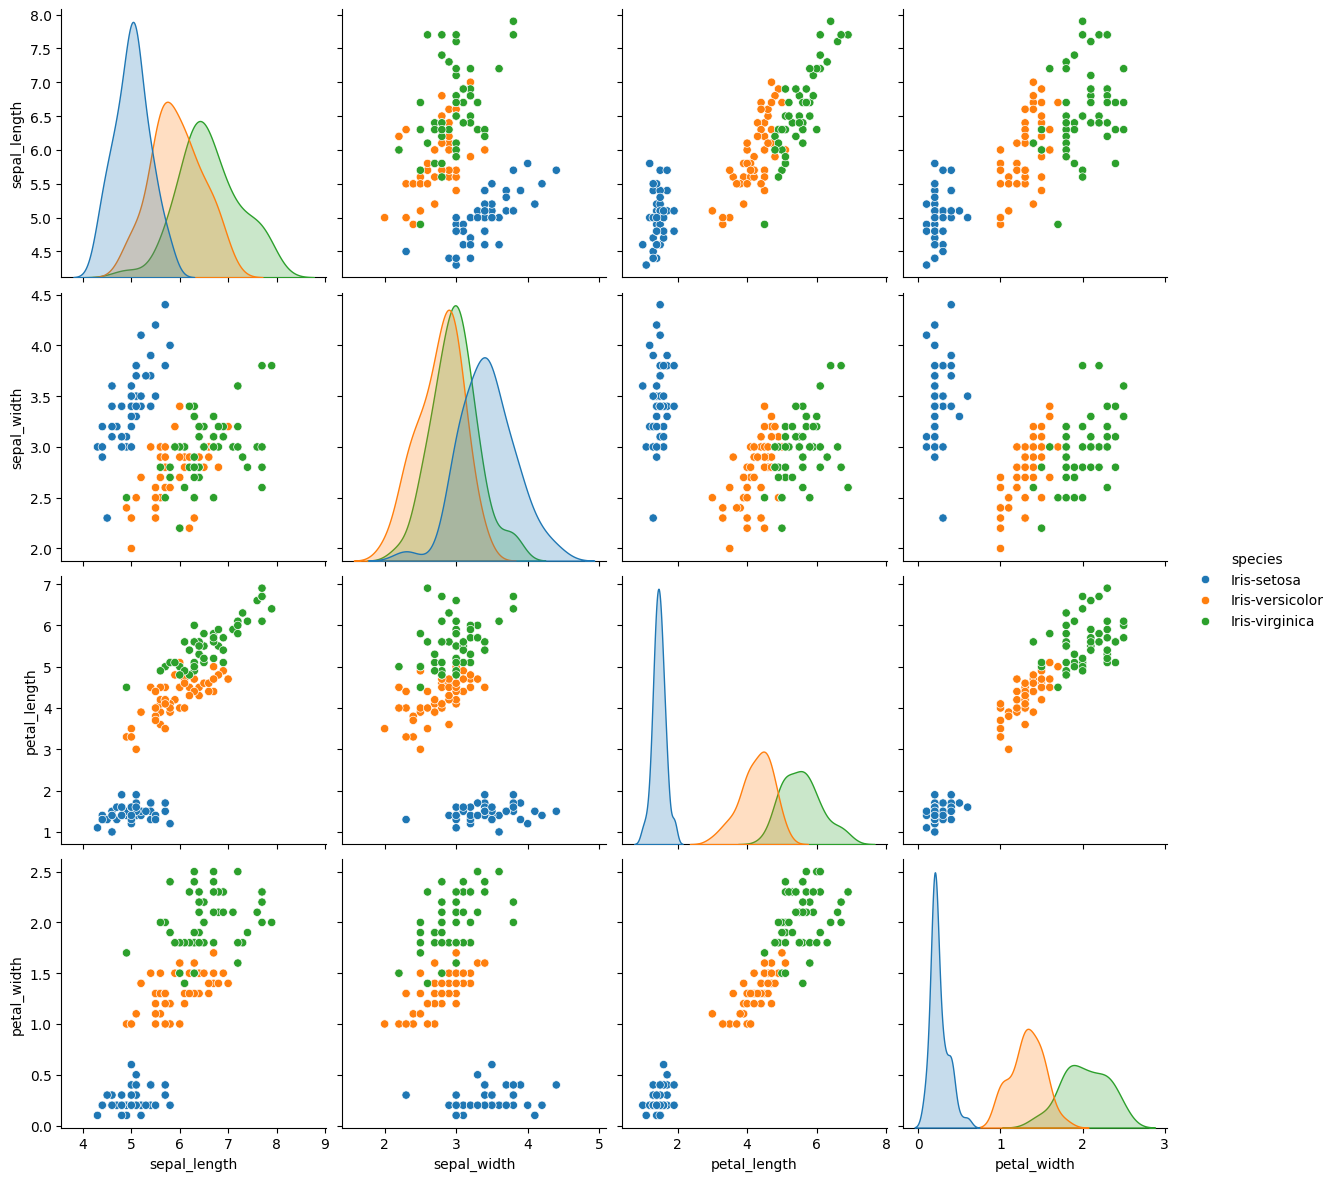

In [42]:
sns.pairplot(d1, hue="species", size=3)

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

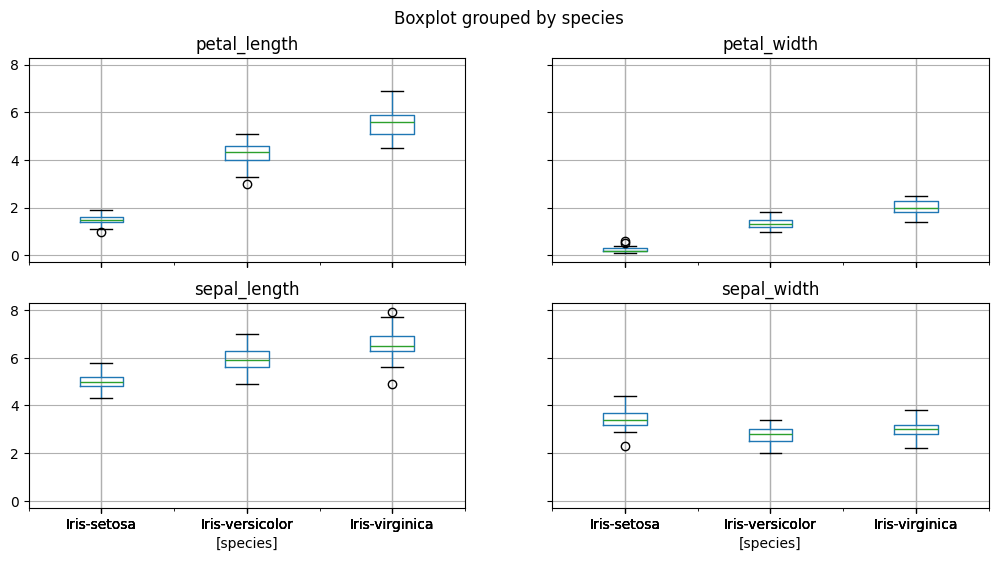

In [43]:
d1.boxplot(by="species", figsize=(12, 6))

<Figure size 1500x1500 with 0 Axes>

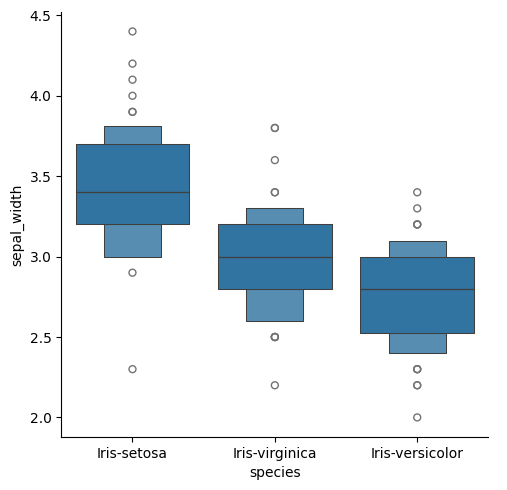

In [44]:
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=d1.sort_values('sepal_width',ascending=False),kind='boxen')

<Axes: xlabel='species', ylabel='sepal_width'>

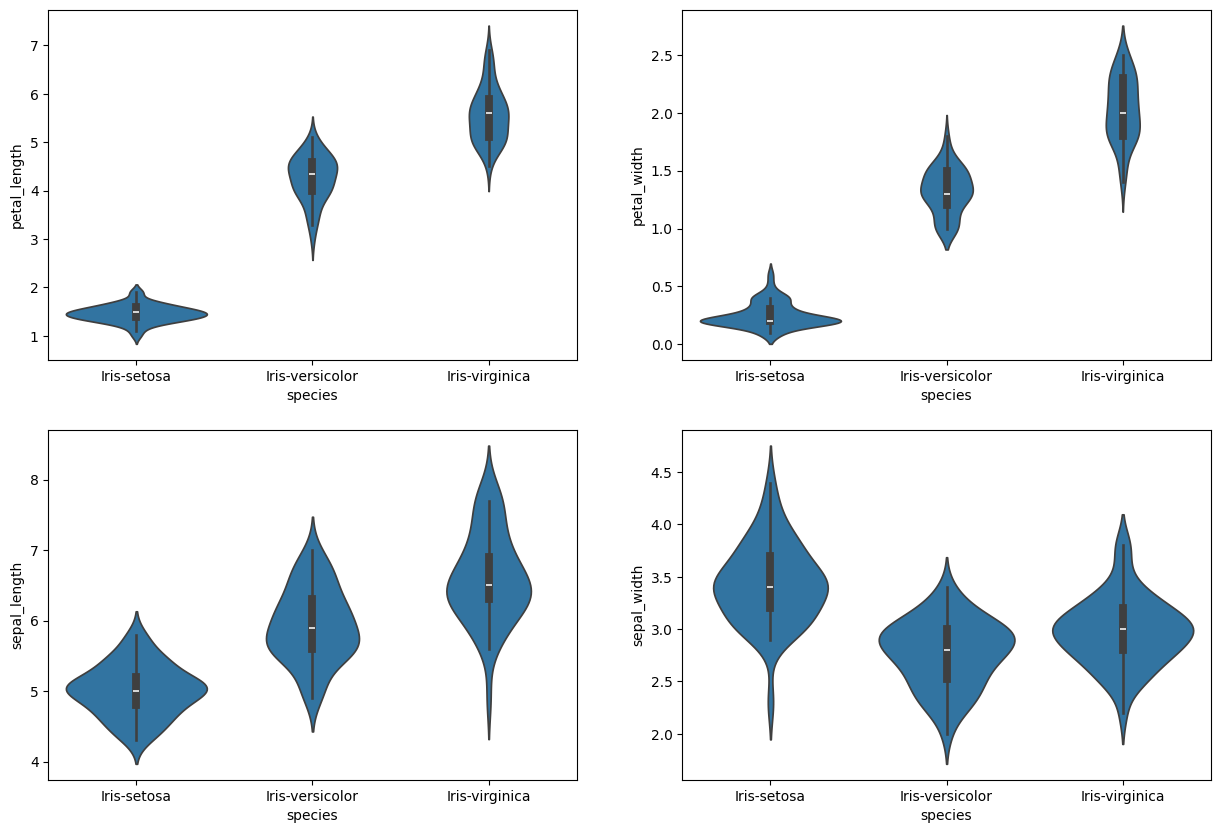

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=d1)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=d1)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=d1)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=d1)

In [46]:
X=d1.drop('species',axis=1)
y=d1['species']


In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [48]:
d1['species'] = pd.Categorical(d1.species)
d1['species'] = d1.species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(d1.species)


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [50]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.9695 - loss: 0.1364 - val_accuracy: 0.9556 - val_loss: 0.1627
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9692 - loss: 0.1434 - val_accuracy: 0.9556 - val_loss: 0.1619
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9849 - loss: 0.1329 - val_accuracy: 0.9778 - val_loss: 0.1606
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9786 - loss: 0.1306 - val_accuracy: 0.9778 - val_loss: 0.1598
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9755 - loss: 0.1359 - val_accuracy: 0.9778 - val_loss: 0.1605
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9849 - loss: 0.1254 - val_accuracy: 0.9556 - val_loss: 0.1620
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9817 - loss: 0.1246 - val_accuracy: 0.9556 - val_loss: 0.1583
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9716 - loss: 0.1263 - val_accuracy: 0.9778 - val_loss

In [53]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9852 - loss: 0.4102


[0.41335710883140564, 0.9777777791023254]

In [61]:
model.save('Iris.h5')

In [54]:
pred = model.predict(X_test[:10])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.0047314  0.37498552 0.6202832 ]
 [0.00331705 0.3506926  0.6459904 ]
 [0.07426674 0.57505697 0.35067624]
 [0.03896829 0.52926487 0.4317668 ]
 [0.9085446  0.0800368  0.01141857]
 [0.03972004 0.5626912  0.39758873]
 [0.00406529 0.31078044 0.6851542 ]
 [0.00455848 0.3290275  0.6664139 ]
 [0.90756893 0.08192976 0.01050133]
 [0.01184978 0.45704806 0.5311021 ]]


In [55]:
history.history['accuracy']

[0.3333333432674408,
 0.343137264251709,
 0.38235294818878174,
 0.36274510622024536,
 0.38235294818878174,
 0.6666666865348816,
 0.7843137383460999,
 0.8039215803146362,
 0.7745097875595093,
 0.7058823704719543,
 0.7058823704719543,
 0.7058823704719543,
 0.6960784196853638,
 0.6764705777168274,
 0.6764705777168274,
 0.7156862616539001,
 0.8333333134651184,
 0.8333333134651184,
 0.686274528503418,
 0.6960784196853638,
 0.7058823704719543,
 0.7843137383460999,
 0.8921568393707275,
 0.9411764740943909,
 0.9313725233078003,
 0.9313725233078003,
 0.9411764740943909,
 0.9411764740943909,
 0.9411764740943909,
 0.9313725233078003,
 0.9411764740943909,
 0.9411764740943909,
 0.9411764740943909,
 0.9411764740943909,
 0.9411764740943909,
 0.9411764740943909,
 0.9313725233078003,
 0.9215686321258545,
 0.9313725233078003,
 0.9509803652763367,
 0.9509803652763367,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272]

In [56]:
history.history['val_accuracy']

[0.3333333432674408,
 0.31111112236976624,
 0.3333333432674408,
 0.3333333432674408,
 0.46666666865348816,
 0.7333333492279053,
 0.7777777910232544,
 0.800000011920929,
 0.6888889074325562,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.800000011920929,
 0.800000011920929,
 0.7111111283302307,
 0.6666666865348816,
 0.6666666865348816,
 0.7111111283302307,
 0.8444444537162781,
 0.9111111164093018,
 0.9111111164093018,
 0.8888888955116272,
 0.9555555582046509,
 0.9333333373069763,
 0.9555555582046509,
 0.8444444537162781,
 0.9333333373069763,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9333333373069763,
 0.9111111164093018,
 0.8888888955116272,
 0.8222222328186035,
 0.8666666746139526,
 0.9111111164093018,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254]

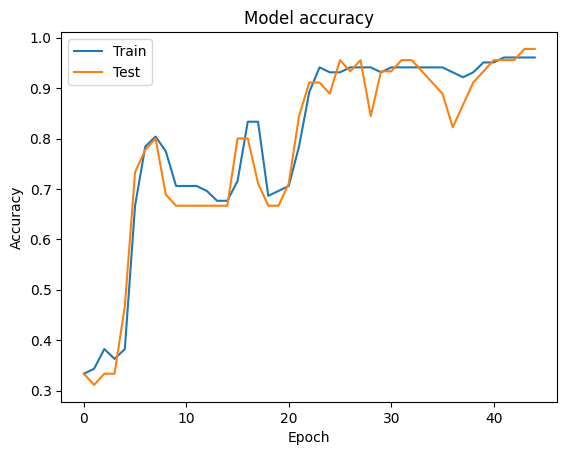

In [57]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

